# Kinematics

## Forward kinematics

joint0_angle = 91.0 degrees
joint1_angle = 104.7 degrees
End Effector at x = -37.8 y = 14.6


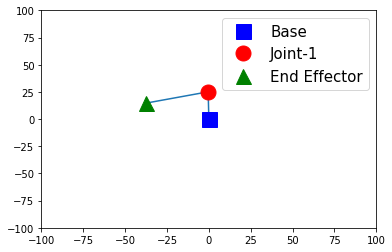

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to compute the arm configuration
def compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle):
    
    def rotate(vector, angle_rad):
        """Rotate 2D `vector` by `angle_rad`"""
        x = vector[0]
        y = vector[1]
        cos_a = np.cos(angle_rad)
        sin_a = np.sin(angle_rad)
        xp = x * cos_a - y * sin_a
        yp = x * sin_a + y * sin_a
        return xp, yp

    
    joint1_x, joint1_y = rotate([link1_length, 0], joint0_angle)
    joint2_x, joint2_y = rotate([link2_length, 0], joint0_angle + joint1_angle)
    p2_x, p2_y = joint1_x + joint2_x, joint1_y + joint2_y
    return joint1_x, joint1_y, p2_x, p2_y

if True:
    link1_length = np.random.random() * 30 + 20
    link2_length = np.random.random() * 30 + 20
    joint0_angle = np.random.random() * 2 * np.pi
    joint1_angle = np.random.random() * 2 * np.pi
else:
    link1_length = 40
    link2_length = 20
    joint0_angle = np.pi / 2
    joint1_angle = -np.pi / 2
    
joint1_x, joint1_y, p2_x, p2_y = compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle)

print("joint0_angle =", round(joint0_angle * 180 / np.pi, 1), "degrees") 
print("joint1_angle =", round(joint1_angle * 180 / np.pi, 1),"degrees") 
print("End Effector at x =", round(p2_x, 1),"y =", round(p2_y, 1))
base_x = 0
base_y = 0
# Plot the links
plt.plot([base_x, joint1_x, p2_x], [base_y, joint1_y, p2_y])
# Plot the base as a blue square
plt.plot(base_x, base_y, 'bs', markersize=15, label='Base')
# Plot Joint-1 as a red circle
plt.plot(joint1_x, joint1_y, 'ro', markersize=15, label='Joint-1')
# Plot End Effector as a green triangle
plt.plot(p2_x, p2_y, 'g^', markersize=15, label='End Effector')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.legend(fontsize=15)
plt.show()